In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
df = pd.read_csv('IRIS.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
lr = LabelEncoder()
df['Species'] = lr.fit_transform(df['species'])
df = df.drop('species', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
scaler = StandardScaler()
standard_features = scaler.fit_transform(df[['sepal_length','sepal_width','petal_length','petal_width']])

In [ ]:
x = standard_features
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

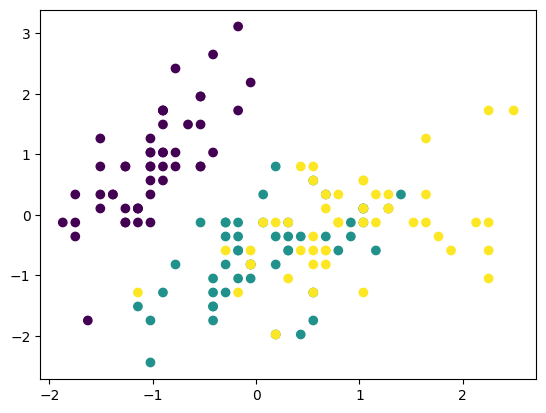

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y)

In [ ]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i, init="k-means++")
  model.fit(x_train)
  wcss.append(model.inertia_)

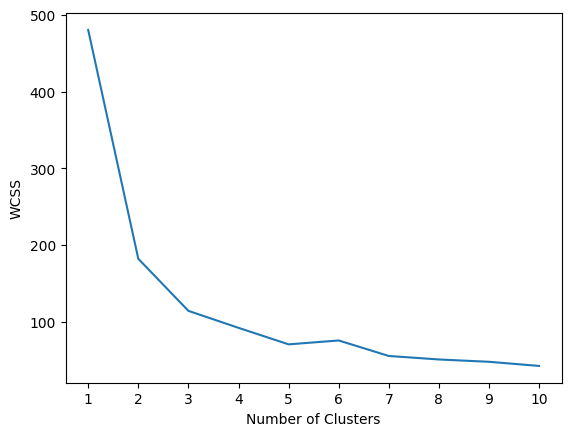

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = KMeans(n_clusters=3, init="k-means++")

In [ ]:
model.fit_predict(x_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2,
       0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 0, 2, 1], dtype=int32)

In [ ]:
model.fit(x_train)

KMeans(n_clusters=3)

In [ ]:
y_pred = model.predict(x_test)

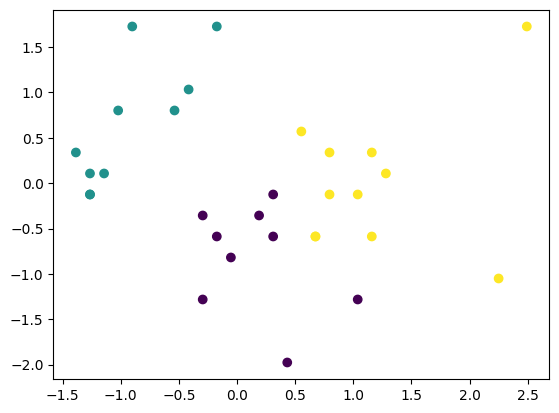

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_pred)

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

3

In [ ]:
silhouette_coefficients = []
for i in range(2,11):
  model = KMeans(n_clusters=i, init="k-means++")
  model.fit(x_train)
  score = silhouette_score(x_train, model.labels_)
  silhouette_coefficients.append(score)

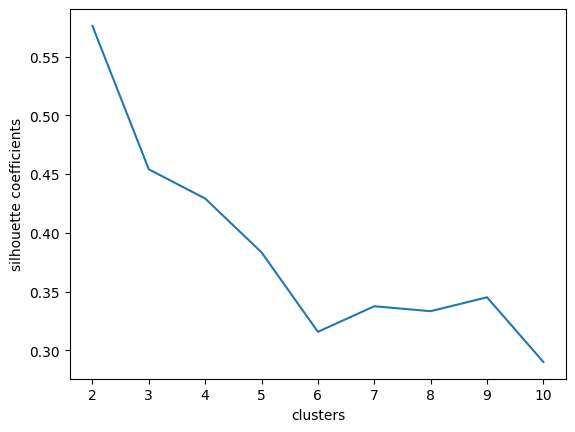

In [ ]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("clusters")
plt.ylabel("silhouette coefficients")
plt.show()